In [56]:
import pandas as pd

Importing and setting data

In [57]:
housing_data = pd.read_csv('/Users/sandeepsawhney/Desktop/Real Estate Predictor/Data/Housing.csv')
housing_data.head

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no  

In [58]:
#Data processing
housing_data['mainroad'] = housing_data['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
housing_data['guestroom'] = housing_data['guestroom'].apply(lambda x : 1 if x == 'yes' else 0)
housing_data['basement'] = housing_data['basement'].apply(lambda x: 1 if x == 'yes' else 0)
housing_data['hotwaterheating'] = housing_data['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
housing_data['airconditioning'] = housing_data['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
housing_data['prefarea'] = housing_data['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)
housing_data = pd.get_dummies(housing_data, columns=['furnishingstatus'], drop_first=True)

housing_data.head

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0          

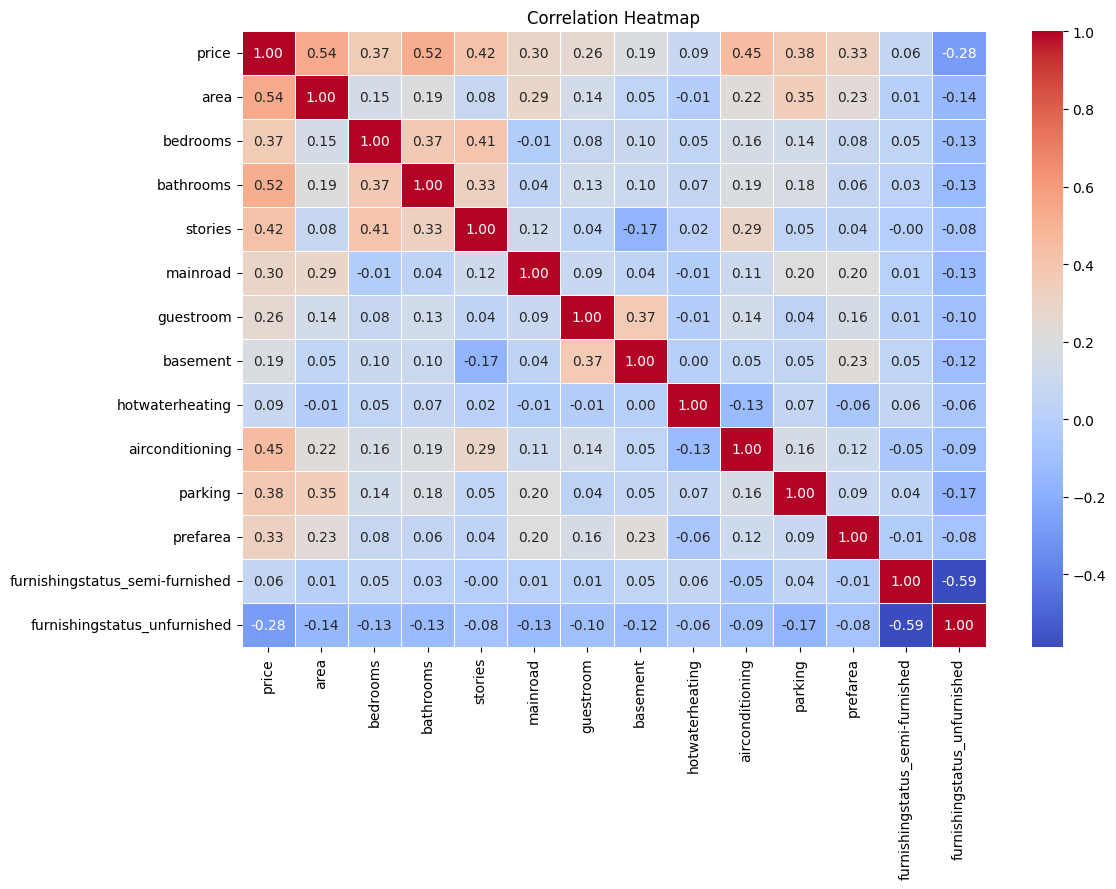

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = housing_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
X = housing_data.drop('price', axis=1)
y = housing_data['price']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 1754318687330.6628
R-squared: 0.6529242642153186


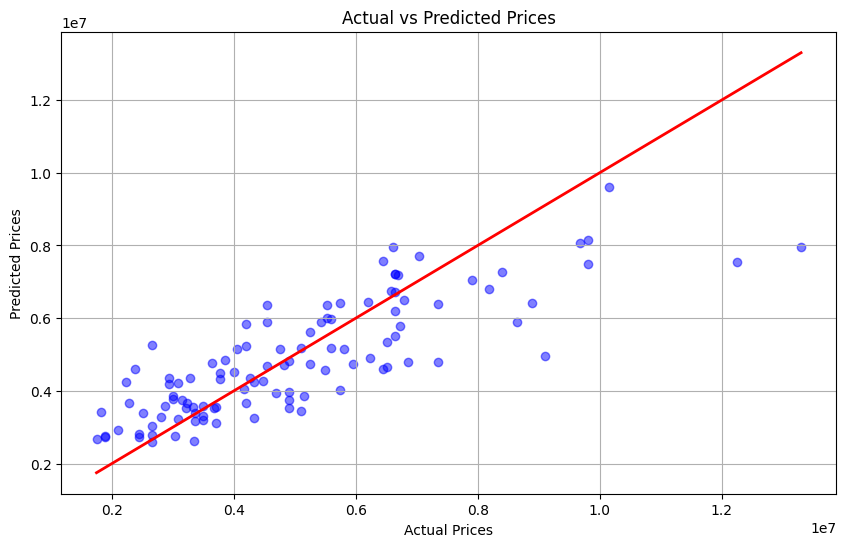

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

The red line in the scatter plot represents the line of perfect prediction, where the predicted prices are equal to the actual prices. Specifically, it is the line 
y=x, where every point on this line has the same value for both the actual and predicted prices.

In the context of the graph:

Points on the red line: These indicate that the model's predictions are exactly correct for those instances.

Points above the red line: These indicate that the model overestimates the housing price (predicted price is higher than the actual price).

Points below the red line: These indicate that the model underestimates the housing price (predicted price is lower than the actual price).

The closer the points are to the red line, the better the model's predictions. Points far from the line indicate larger prediction errors.

**Creation of a Neural Network**

In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/Users/sandeepsawhney/Desktop/Real Estate Predictor/Data/Housing.csv'
housing_data = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                       'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_columns:
    le = LabelEncoder()
    housing_data[col] = le.fit_transform(housing_data[col])
    label_encoders[col] = le

# Separate features and target
X = housing_data.drop('price', axis=1)
y = housing_data['price']

# Normalize numerical features
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((436, 12), (109, 12), (436,), (109,))

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Create a neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, 
                    callbacks=[EarlyStopping(patience=10)], verbose=0)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae}')

# Predictions
y_pred = model.predict(X_test)

# Calculate accuracy (R^2 score)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 15709713203200.0000 - mae: 3661061.7500
Test MAE: 3803315.75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
R^2 Score: -2.309278726577759


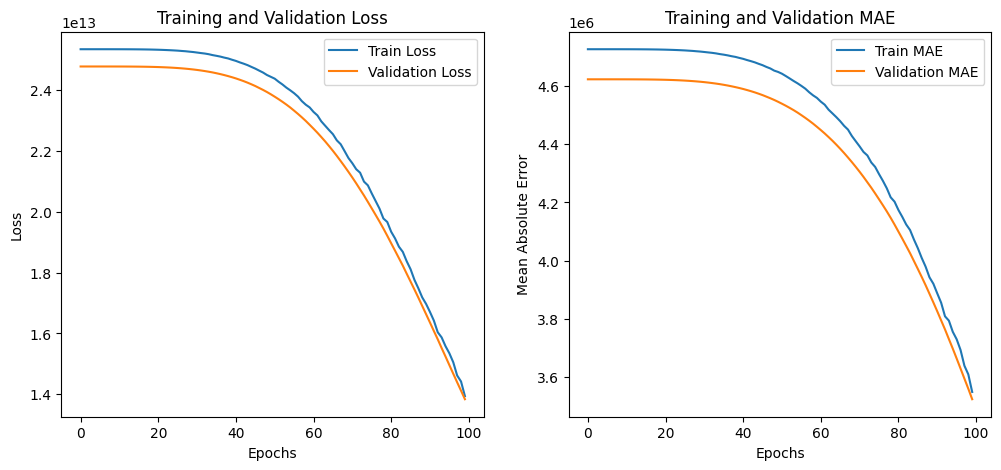

In [68]:
# Plot the training history
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training and Validation MAE')

plt.show()

**Neural Network With Tuning**

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Create a simpler neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, 
                    callbacks=[EarlyStopping(patience=10)], verbose=0)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae}')

# Predictions
y_pred = model.predict(X_test)

# Calculate accuracy (R^2 score)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 26545963925504.0000 - mae: 4674381.5000
Test MAE: 4862255.5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
R^2 Score: -4.573055267333984


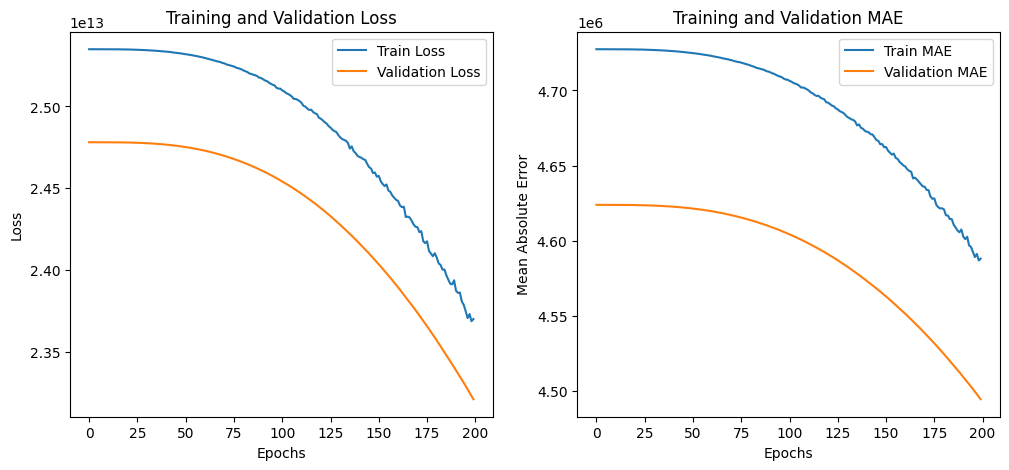

In [71]:
# Plot the training history
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training and Validation MAE')

plt.show()

**Keras Tuner Model**

In [72]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/Users/sandeepsawhney/Desktop/Real Estate Predictor/Data/Housing.csv'
housing_data = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                       'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_columns:
    le = LabelEncoder()
    housing_data[col] = le.fit_transform(housing_data[col])
    label_encoders[col] = le

# Create new features (feature engineering)
housing_data['total_rooms'] = housing_data['bedrooms'] + housing_data['bathrooms']
housing_data['area_per_room'] = housing_data['area'] / (housing_data['total_rooms'] + 1)  # +1 to avoid division by zero

# Separate features and target
X = housing_data.drop('price', axis=1)
y = housing_data['price']

# Normalize numerical features
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((436, 14), (109, 14), (436,), (109,))

In [73]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                    activation=hp.Choice('activation', ['relu', 'tanh']), 
                    input_dim=X_train.shape[1],
                    kernel_regularizer=l2(hp.Float('l2', min_value=1e-4, max_value=1e-2, sampling='LOG'))))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'layer_{i}_units', min_value=32, max_value=256, step=32),
                        activation=hp.Choice('layer_activation', ['relu', 'tanh']),
                        kernel_regularizer=l2(hp.Float(f'l2_{i}', min_value=1e-4, max_value=1e-2, sampling='LOG'))))
        model.add(Dropout(rate=hp.Float(f'layer_{i}_dropout', min_value=0.1, max_value=0.5, step=0.1)))
    
    model.add(Dense(1))
    
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='mse', metrics=['mae'])
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='keras_tuner',
    project_name='housing_price_prediction'
)

tuner.search_space_summary()

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[EarlyStopping(patience=10)])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
tuner.results_summary()

Trial 20 Complete [00h 00m 07s]
val_loss: 24777071788032.0

Best val_loss So Far: 1168724066304.0
Total elapsed time: 00h 02m 29s
Results summary
Results in keras_tuner/housing_price_prediction
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 02 summary
Hyperparameters:
units: 288
activation: relu
l2: 0.00035520766754210267
dropout: 0.4
num_layers: 2
layer_0_units: 64
layer_activation: relu
l2_0: 0.0005317095449862572
layer_0_dropout: 0.4
learning_rate: 0.005737668868809639
layer_1_units: 64
l2_1: 0.007775645935042448
layer_1_dropout: 0.30000000000000004
Score: 1168724066304.0

Trial 17 summary
Hyperparameters:
units: 512
activation: relu
l2: 0.0003133857760621912
dropout: 0.5
num_layers: 1
layer_0_units: 96
layer_activation: relu
l2_0: 0.000807314872200373
layer_0_dropout: 0.2
learning_rate: 0.005074107037826867
layer_1_units: 32
l2_1: 0.0002508748601218214
layer_1_dropout: 0.2
layer_2_units: 64
l2_2: 0.0005537692709028675
layer_2_dropout: 0.5
Score: 215284056

In [74]:
# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, 
                    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)], verbose=0)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae}')

# Predictions
y_pred = model.predict(X_test)

# Calculate accuracy (R^2 score)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 1749226487808.0000 - mae: 979225.3750
Test MAE: 1010911.6875
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
R^2 Score: 0.6337150931358337


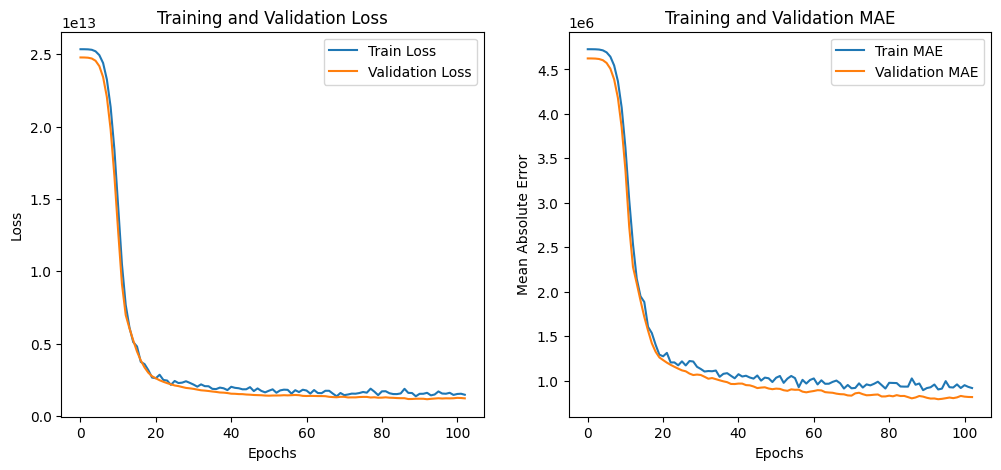

In [76]:
import matplotlib.pyplot as plt

# Plot the training history
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training and Validation MAE')

plt.show()

In [77]:
r2

0.6337150931358337

**Implementing XGBOOST**

In [79]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/Users/sandeepsawhney/Desktop/Real Estate Predictor/Data/Housing.csv'
housing_data = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                       'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_columns:
    le = LabelEncoder()
    housing_data[col] = le.fit_transform(housing_data[col])
    label_encoders[col] = le

# Create new features (feature engineering)
housing_data['total_rooms'] = housing_data['bedrooms'] + housing_data['bathrooms']
housing_data['area_per_room'] = housing_data['area'] / (housing_data['total_rooms'] + 1)  # +1 to avoid division by zero
housing_data['bathroom_per_bedroom'] = housing_data['bathrooms'] / (housing_data['bedrooms'] + 1)  # +1 to avoid division by zero

# Separate features and target
X = housing_data.drop('price', axis=1)
y = housing_data['price']

# Normalize numerical features
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((436, 15), (109, 15), (436,), (109,))

In [80]:
import xgboost as xgb
from sklearn.metrics import r2_score

# Initialize the model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)

# Train the model
xg_reg.fit(X_train, y_train)

# Predictions
y_pred = xg_reg.predict(X_test)

# Calculate accuracy (R^2 score)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Convert R^2 score to percentage
accuracy_percentage = r2 * 100
print(f'Model Accuracy: {accuracy_percentage:.2f}%')

R^2 Score: 0.6451054215431213
Model Accuracy: 64.51%


In [81]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'alpha': [1, 10, 50, 100],
    'n_estimators': [100, 200, 300, 500]
}

# Initialize the model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, scoring='r2', cv=5, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predictions
y_pred = best_model.predict(X_test)

# Calculate accuracy (R^2 score)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Convert R^2 score to percentage
accuracy_percentage = r2 * 100
print(f'Model Accuracy: {accuracy_percentage:.2f}%')

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
Best Parameters: {'alpha': 1, 'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
R^2 Score: 0.6356706619262695
Model Accuracy: 63.57%


**Train XGBoost and Get Feature Importances**

                 feature  importance
2              bathrooms    0.168252
8        airconditioning    0.148697
10              prefarea    0.112446
14  bathroom_per_bedroom    0.103100
0                   area    0.068834
9                parking    0.067776
11      furnishingstatus    0.047175
3                stories    0.045300
4               mainroad    0.045090
6               basement    0.036789
13         area_per_room    0.036418
1               bedrooms    0.036375
5              guestroom    0.034730
7        hotwaterheating    0.026632
12           total_rooms    0.022386


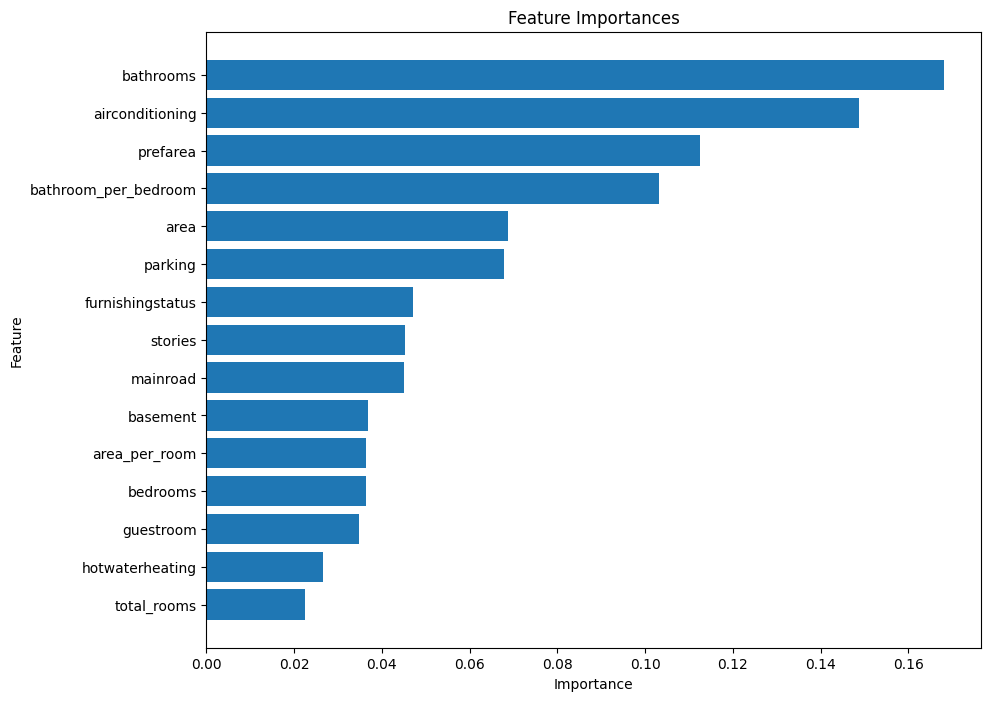

In [82]:
import xgboost as xgb
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Train the model with the initial parameters
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train, y_train)

# Get feature importances
importances = xg_reg.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [83]:
# Select the top N features
top_features = feature_importances['feature'].head(10).tolist()
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

In [84]:
# Train the model with top features
xg_reg.fit(X_train_top, y_train)

# Predictions
y_pred = xg_reg.predict(X_test_top)

# Calculate accuracy (R^2 score)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Convert R^2 score to percentage
accuracy_percentage = r2 * 100
print(f'Model Accuracy: {accuracy_percentage:.2f}%')

R^2 Score: 0.6219410300254822
Model Accuracy: 62.19%


**Ensemble Methods**

In [85]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Define base models
base_models = [
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                             max_depth=5, alpha=10, n_estimators=100)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

# Define meta model
meta_model = LinearRegression()

In [86]:
# Create stacking regressor
stacking_reg = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train the stacking regressor
stacking_reg.fit(X_train, y_train)

# Predictions
y_pred = stacking_reg.predict(X_test)

# Calculate accuracy (R^2 score)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Convert R^2 score to percentage
accuracy_percentage = r2 * 100
print(f'Model Accuracy: {accuracy_percentage:.2f}%')

R^2 Score: 0.6435704956764584
Model Accuracy: 64.36%


**Data Quality Check**